# Mini project 3

## Task 1

### Importing and loading data

In [158]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


In [159]:
# Importing the data
x_train = pd.read_csv("./UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, delim_whitespace=True)
y_train = pd.read_csv("./UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None, delim_whitespace=True)
features = x_train.shape[1]
print(x_train.shape, y_train.shape)


(7352, 561) (7352, 1)


In [160]:
# Fitting the training data to the function

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_train.values)
distances, indices = nbrs.kneighbors(x_train)

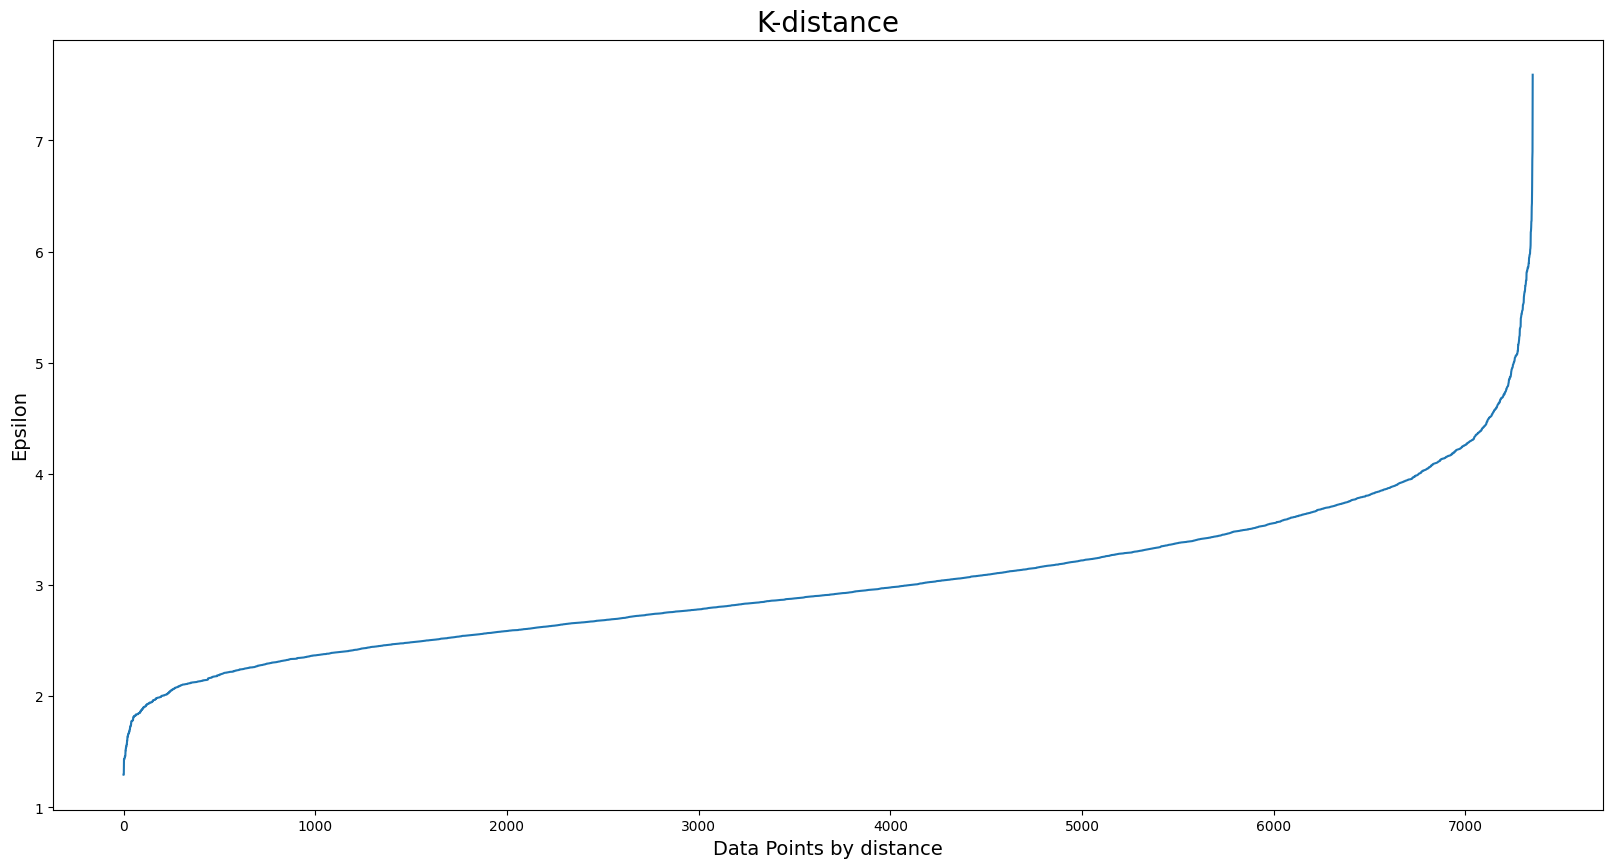

In [161]:
# Plotting K-distance in a graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance',fontsize=20)
plt.xlabel('Data Points by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [162]:
# Clustering and labeling
cluster=DBSCAN(eps=5,min_samples=(2*features))
cluster_labels = cluster.fit_predict(x_train)
x_train['DBSCAN_labels']=cluster.labels_
x_train['DBSCAN_labels'].value_counts()

-1    3893
 0    3459
Name: DBSCAN_labels, dtype: int64

In [163]:
# Silhouette scoring
silhouette_scoring = silhouette_score(x_train, cluster_labels)
print("Silhouette score is {0:.2f}".format(silhouette_scoring))

Average silhouette is 0.40


In [164]:
# Visualizing the clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=69)
x_train_tsne = tsne.fit_transform(x_train.values)

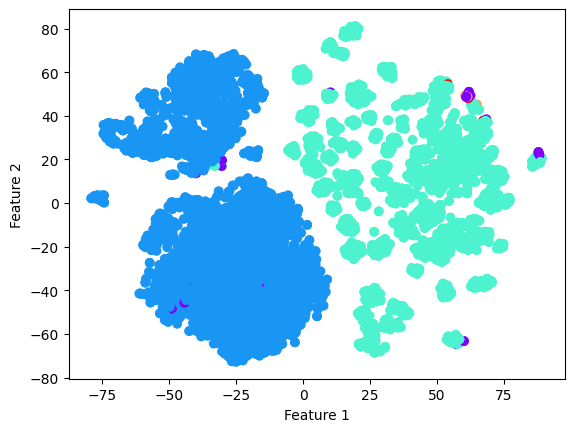

In [170]:
# Plotting the clusters in a graph
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Task 2


In [166]:
# Reducing the dimensions of thfrom sklearn.decomposition import PCA
pca_reduction = PCA(n_components=2)
pca_components = pca_reduction.fit_transform(x_train.values)
pca_df = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()


,principal component 1,principal component 2
0,-5.544544,-0.244835
1,-5.559821,-0.028193
2,-5.499817,0.346159
3,-5.701711,0.950107
4,-5.773200,1.218139


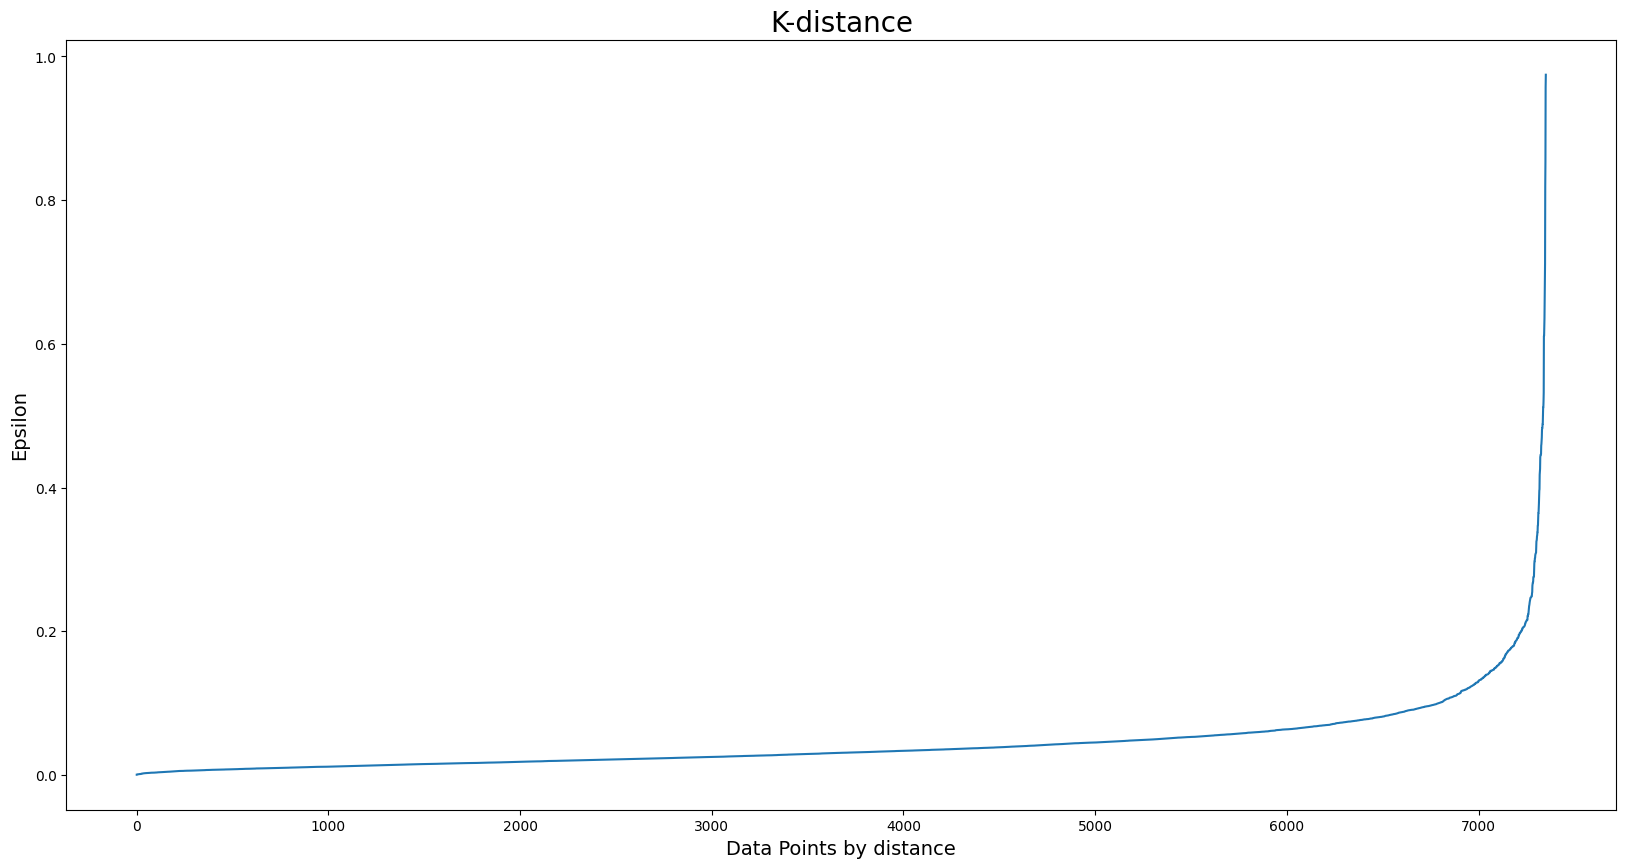

In [167]:

# Fitting the new df into the same function as earlier

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)

# Plotting the new graph using the same parameters as earlier

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance',fontsize=20)
plt.xlabel('Data Points by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [168]:
# CLustering and labeling and also calculating the average silhouette again

cluster=DBSCAN(eps=0.5,min_samples=(4))
cluster_labels = cluster.fit_predict(pca_df)
pca_df['DBSCAN_labels']=cluster.labels_
pca_df['DBSCAN_labels'].value_counts()
silhouette_scoring = silhouette_score(pca_df, cluster_labels)
print("Silhouette score is {0:.2f}".format(silhouette_scoring))

 0    4045
 1    3255
-1      39
 3       5
 2       4
 4       4
Name: DBSCAN_labels, dtype: int64

### Task 3

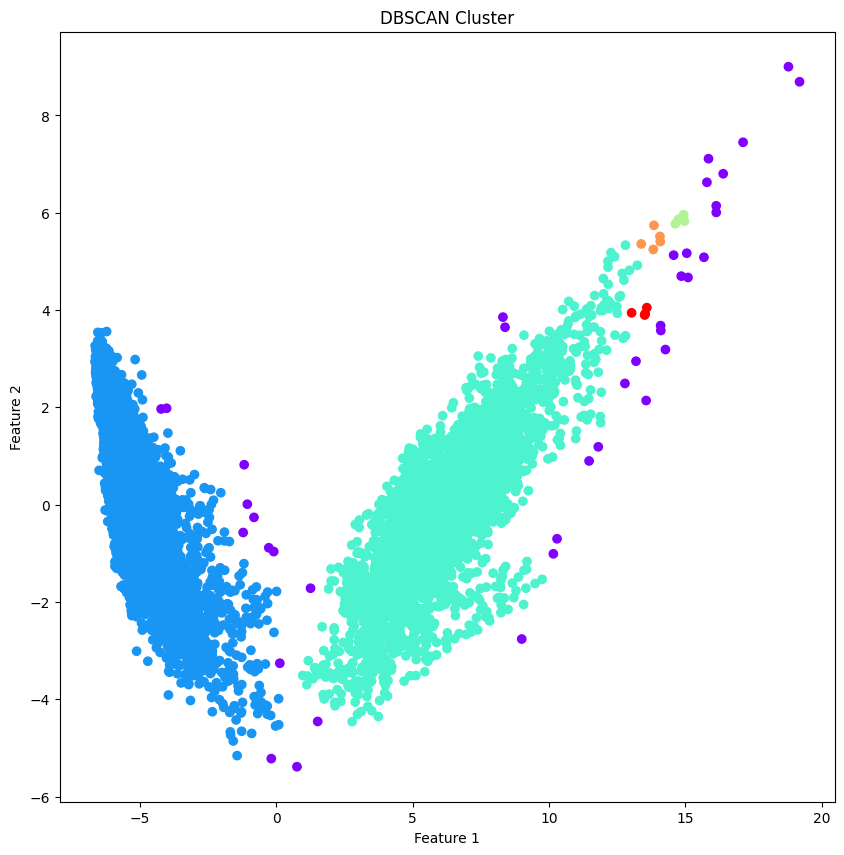

In [175]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],c=pca_df['DBSCAN_labels'],cmap="rainbow")
plt.title('DBSCAN Cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()